In [71]:
import matplotlib.pyplot as plt
import numpy as np

(5, 8)
[4.6100000e-02 2.0000000e-01 8.6300000e-01 3.0512000e+00 1.0365100e+01
 4.3408000e+01 2.2421510e+02 1.5295648e+03]
[4.6000000e-02 1.9800000e-01 8.6140000e-01 3.0512000e+00 1.0373700e+01
 4.3331400e+01 2.2388350e+02 1.4425852e+03]
[7.2800000e-02 2.9720000e-01 1.2651000e+00 4.3897000e+00 1.4193200e+01
 3.4049600e+01 2.5469520e+02 1.5493682e+03]
[7.0900000e-02 2.9050000e-01 1.2619000e+00 4.3772000e+00 1.4176300e+01
 5.3926400e+01 2.5465150e+02 1.5473358e+03]
[7.1600000e-02 2.9270000e-01 1.2573000e+00 4.3797000e+00 1.4201500e+01
 5.3978900e+01 2.5434840e+02 1.5493201e+03]
(5, 8)
[2.880000e-02 1.139000e-01 4.577000e-01 1.559600e+00 5.105700e+00
 1.999480e+01 9.207250e+01 6.092071e+02]
[2.500000e-02 1.081000e-01 4.576000e-01 1.563700e+00 5.105500e+00
 1.986870e+01 9.232670e+01 5.526703e+02]
[3.840000e-02 1.607000e-01 6.654000e-01 2.267600e+00 7.092000e+00
 2.535060e+01 1.075584e+02 6.454177e+02]
[3.750000e-02 1.549000e-01 6.617000e-01 2.243000e+00 7.095300e+00
 2.468360e+01 1.073373e+

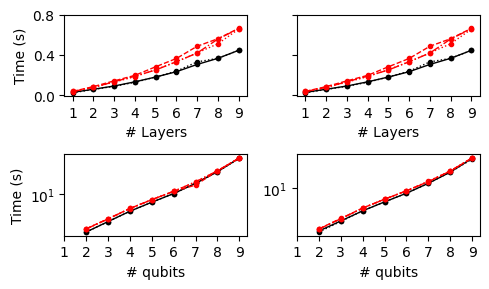

In [85]:

gd = [
    '0.0288',
    '0.0976',
    '0.1605',
    '0.2354',
    '0.3222',
    '0.4667',
    '0.5375',
    '0.6448',
    '0.7831'
]

adam = [
    '0.0250',
    '0.0968',
    '0.1604',
    '0.236',
    '0.3221',
    '0.4664',
    '0.5346',
    '0.6454',
    '0.7823'
]

qng_qfsm = [
    '0.0384',
    '0.1531',
    '0.2496',
    '0.3807',
    '0.5124',
    '0.6566',
    '0.821',
    '0.9989',
    '1.1885'
]

qng_qfim = [
    '0.0372',
    '0.1435',
    '0.2345',
    '0.3431',
    '0.4673',
    '0.6097',
    '0.7682',
    '0.9356',
    '1.1263'
]

qng_qfim_adam = [
    '0.0372',
    '0.1448',
    '0.2352',
    '0.3431',
    '0.468',
    '0.6097',
    '0.7688',
    '0.9347',
    '1.1275'
]

gd = [
    0.0288,
    0.0596,
    0.0917,
    0.1332,
    0.1807,
    0.2336,
    0.3056,
    0.3661,
    0.4455,
]

adam = [
    0.0250,
    0.0579,
    0.0891, 0.1291, 0.1811, 0.2387, 0.3306, 0.3657, 0.4453
]

qng_qfsm = [
    0.0384, 0.0857, 0.1425, 0.1973, 0.2822, 0.3645, 0.4857, 0.5602, 0.6631
]

qng_qfim = [
    0.0375, 0.0772, 0.1347, 0.1888, 0.2506, 0.3318, 0.4187, 0.5574, 0.6598
]

qng_adam = [
    0.0372, 0.0782, 0.1302, 0.1848, 0.2532, 0.3329, 0.42, 0.5105, 0.6556
]

optimizers_cad113 = [gd, adam, qng_qfsm, qng_qfim, qng_adam]

gd = [
    0.0288,
    0.0596,
    0.0917,
    0.1332,
    0.1807,
    0.2336,
    0.3056,
    0.3661,
    0.4455,
]

adam = [
    0.0250,
    0.0579,
    0.0891, 0.1291, 0.1811, 0.2387, 0.3306, 0.3657, 0.4453
]

qng_qfsm = [
    0.0384, 0.0857, 0.1425, 0.1973, 0.2822, 0.3645, 0.4857, 0.5602, 0.6631
]

qng_qfim = [
    0.0375, 0.0772, 0.1347, 0.1888, 0.2506, 0.3318, 0.4187, 0.5574, 0.6598
]

qng_adam = [
    0.0372, 0.0782, 0.1302, 0.1848, 0.2532, 0.3329, 0.42, 0.5105, 0.6556
]

num_qubits_cad113 = np.array([[0.0461, 0.046, 0.0728, 0.0709, 0.0716],
 [0.200, 0.198, 0.2972, 0.2905, 0.2927],
 [0.863, 0.8614, 1.2651, 1.2619, 1.2573],
 [3.0512, 3.0512, 4.3897, 4.3772, 4.3797],
 [10.3651, 10.3737, 14.1932, 14.1763, 14.2015],
 [43.408, 43.3314, 34.0496, 53.9264, 53.9789],
 [224.2151, 223.8835, 254.6952, 254.6515, 254.3484],
 [1529.5648, 1442.5852, 1549.3682, 1547.3358, 1549.3201]])

num_qubits_wonder40 = np.array([
 [0.0288, 0.0250, 0.0384, 0.0375, 0.0372],
 [0.1139, 0.1081, 0.1607, 0.1549, 0.1538],
 [0.4577, 0.4576, 0.6654, 0.6617, 0.6606],
 [1.5596, 1.5637, 2.2676, 2.2430, 2.2677],
 [5.1057, 5.1055, 7.092, 7.0953, 7.0612],
 [19.9948, 19.8687, 25.3506, 24.6836, 26.8791],
 [92.0725, 92.3267, 107.5584, 107.3373, 106.7147],
 [609.2071, 552.6703, 645.4177, 643.0358, 643.535]
])


optimizers_wonder40 = [gd, adam, qng_qfsm, qng_qfim, qng_adam]

labels = ['GD', 'Adam', 'QNG-QFSM-GD', 'QNG-QFIM-GD', 'QNG-QFIM-Adam']
line_styles = ['solid', 'dotted', 'dashed', 'dashdot', 'dotted']
colors = ['black', 'black', 'red', 'red', 'red']
layers = list(range(1, 10))
qubits = list(range(2, 10))
num_layers_timess = [optimizers_cad113, optimizers_wonder40]
num_qubits_timess = [np.transpose(num_qubits_cad113), np.transpose(num_qubits_wonder40)]
fig, axs = plt.subplots(2, 2, figsize=(5,3))
for j in range(2):
    num_layers_times = num_layers_timess[j]
    for i, times in enumerate(num_layers_times):
        time = [float(y) for y in times]
        axs[0,j].plot(layers, time, marker='o',
                markersize = 3, linewidth = 1, label=labels[i], linestyle=line_styles[i], color=colors[i])
    axs[0,j].set_xticks(range(1, 10), layers)
    if j == 1:
        axs[0,j].set_yticklabels([])  
    if j == 0:
        axs[0,j].set_ylabel('Time (s)')
    axs[0,j].set_yticks([0, 0.4, 0.8])
    axs[0,j].set_xlabel('# Layers')
    
for j in range(2):
    num_qubits_times = num_qubits_timess[j]
    print(num_qubits_times.shape)
    for i, times in enumerate(num_qubits_times):
        print(times)
        axs[1,j].plot(qubits, times, marker='o',
                markersize = 3, linewidth = 1, label=labels[i], linestyle=line_styles[i], color=colors[i])
    axs[1,j].set_xticks(range(1, 10), layers)
    if j == 1:
        axs[1,j].set_yticklabels([])  
    if j == 0:
        axs[1,j].set_ylabel('Time (s)')
    #axs[1,j].set_yticks([0, 0.4, 0.8])
    axs[1,j].set_yscale('log')
    axs[1,j].set_xlabel('# qubits')
    
#plt.legend(loc='upper left', ncols=2, bbox_to_anchor=(-1, -0.5))
plt.tight_layout()
plt.savefig('./data/images/optimizers.pdf')

In [70]:
import numpy as np



array([[4.6100000e-02, 2.0000000e-01, 8.6300000e-01, 3.0512000e+00,
        1.0365100e+01, 4.3408000e+01, 2.2421510e+02, 1.5295648e+03],
       [4.6000000e-02, 1.9800000e-01, 8.6140000e-01, 3.0512000e+00,
        1.0373700e+01, 4.3331400e+01, 2.2388350e+02, 1.4425852e+03],
       [7.2800000e-02, 2.9720000e-01, 1.2651000e+00, 4.3897000e+00,
        1.4193200e+01, 3.4049600e+01, 2.5469520e+02, 1.5493682e+03],
       [7.0900000e-02, 2.9050000e-01, 1.2619000e+00, 4.3772000e+00,
        1.4176300e+01, 5.3926400e+01, 2.5465150e+02, 1.5473358e+03],
       [7.1600000e-02, 2.9270000e-01, 1.2573000e+00, 4.3797000e+00,
        1.4201500e+01, 5.3978900e+01, 2.5434840e+02, 1.5493201e+03]])